## Datenanalyse

Hier werden die Expertenprofile analysiert.

Zuerst werden die Daten allgemein analysiert.

Anschließend gibts ein Deep Dive in die wichtigsten Datenfelder:

- jobTitles
- branches
- skills


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

In [4]:
PATH = "drive/MyDrive/Uni/Master/Masterthesis/Data/"

In [5]:
# JSON-Datei einlesen
expert_df = pd.read_json(PATH + "anonymized-profiles.json")

print(expert_df.head())

                                            branches companyLocationCity  \
0  [Technologie, Medien & Werbung, Unternehmensdi...          Lennestadt   
1                     [Unternehmensdienstleistungen]         Lüdenscheid   
2  [Automobilindustrie, Maschinenbau und Industri...         Lüdenscheid   
3  [Unternehmensdienstleistungen, Investor (Eigen...         Lüdenscheid   
4                      [Logistik, Konsum und Handel]         Ludenscheid   

   companyLocationStreet  companyLocationZip            companyName  \
0      Hagener Straße 64             57368.0        lenne.Tech GmbH   
1   Sauerfelder Straße 5             58511.0            RegioKonneX   
2   Sauerfelder Straße 5             58511.0            RegioKonneX   
3  Sauerfelder Straße 4              58511.0            RegioKonneX   
4   Wefelshohler Str 48a             58511.0  Karl Koerschulte GmbH   

       companyTypes      companyWebsite  \
0  [Dienstleistung]  https://lenne.tech   
1  [Dienstleistung]  www.regio

## Allgemeine Analyse Datensatz

In [ ]:
len(expert_df)

347

In [ ]:
import numpy as np

# Returns True if the given value should be treated as missing.
# In addition to None and NaN, empty lists are considered missing values.
def is_missing(x):
    if x is None or (isinstance(x, float) and np.isnan(x)):
        return True
    if isinstance(x, list) and len(x) == 0:
        return True
    return False

# Compute the number of missing values per column.
# applymap applies the is_missing check to every cell in the DataFrame.
missing_counts = expert_df.applymap(is_missing).sum()

# Calculate the percentage of missing values per column.
missing_percentage = (missing_counts / len(expert_df)) * 100

# Combine absolute and relative missing statistics into a summary DataFrame.
missing_summary = pd.DataFrame({
    'Anzahl_Nullwerte': missing_counts,
    'Prozent_Nullwerte': missing_percentage.round(2)
})

# Output the summary sorted by the highest number of missing values.
print(missing_summary.sort_values(by="Anzahl_Nullwerte", ascending=False))

                            Anzahl_Nullwerte  Prozent_Nullwerte
employeeOfInstitutionNames               344              99.14
title                                    329              94.81
description                              206              59.37
projectsDescription                      140              40.35
skills                                    62              17.87
companyWebsite                            60              17.29
companyTypes                              44              12.68
branches                                  31               8.93
companyLocationStreet                     27               7.78
companyLocationZip                        26               7.49
companyLocationCity                       26               7.49
companyName                               26               7.49
jobTitle                                  16               4.61
id                                         0               0.00
gender                                  

/tmp/ipython-input-367920113.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  missing_counts = expert_df.applymap(is_missing).sum()


In [ ]:
# Compute the total number of null (NaN) values per column.
# isnull() creates a boolean mask, sum() counts True values column-wise.
null_counts = expert_df.isnull().sum()

# Print absolute null counts per column.
print(null_counts)

# Optionally compute the percentage of null values per column.
# The count of nulls is divided by the total number of rows.
null_percentage = (expert_df.isnull().sum() / len(expert_df)) * 100

# Print percentage values rounded to two decimal places.
print(null_percentage.round(2))

branches                        6
companyLocationCity            26
companyLocationStreet          27
companyLocationZip             26
companyName                    26
companyTypes                   24
companyWebsite                 60
description                   206
employeeOfInstitutionNames      0
firstName                       0
gender                          0
id                              0
jobTitle                       16
lastName                        0
projectsDescription           140
skills                          0
title                         329
dtype: int64
branches                       1.73
companyLocationCity            7.49
companyLocationStreet          7.78
companyLocationZip             7.49
companyName                    7.49
companyTypes                   6.92
companyWebsite                17.29
description                   59.37
employeeOfInstitutionNames     0.00
firstName                      0.00
gender                         0.00
id           

In [ ]:
# Filter the DataFrame to retain only profiles that meet all required field conditions:
# - jobTitle must be non-null and not an empty/whitespace-only string
# - skills must be a non-empty list
# - branches must be a non-empty list
profiles_with_all_fields = expert_df[
    expert_df['jobTitle'].dropna().apply(lambda x: len(str(x).strip()) > 0) &
    expert_df['skills'].apply(lambda x: isinstance(x, list) and len(x) > 0) &
    expert_df['branches'].apply(lambda x: isinstance(x, list) and len(x) > 0)
]

# Output the filtered profiles for inspection.
print("Profile mit ausgefüllten jobTitle, skills und branches:")
display(profiles_with_all_fields)

# Return the number of profiles that satisfy all conditions.
len(profiles_with_all_fields)

Profile mit ausgefüllten jobTitle, skills und branches:


,branches,companyLocationCity,companyLocationStreet,companyLocationZip,companyName,companyTypes,companyWebsite,description,employeeOfInstitutionNames,firstName,gender,id,jobTitle,lastName,projectsDescription,skills,title
0,"[Technologie, Medien & Werbung, Unternehmensdi...",Lennestadt,Hagener Straße 64,57368.0,lenne.Tech GmbH,[Dienstleistung],https://lenne.tech,Seit über 15 Jahren begleite ich digitale Proj...,[],Ege,MALE,65acfb5a3897d6f0e6506db1,Softwareentwickler,Siebert,"lenne.Tech unterstützt Unternehmen, Selbststän...","[Softwareentwicklung, Web-Entwicklung, IT-Syst...",None
1,[Unternehmensdienstleistungen],Lüdenscheid,Sauerfelder Straße 5,58511.0,RegioKonneX,[Dienstleistung],www.regiokonnex.de,Ich bin Mitglied von Team RegioKonneX und steh...,[RegioKonneX],Hendrik,MALE,65ad7c463897d6f0e6508e88,"Administrator, Projektmanager",Nöh,Als Angebot der SWF Beratung GmbH unterstützen...,"[Financial Management, Cybersecurity, Finance,...",None
2,"[Automobilindustrie, Maschinenbau und Industri...",Lüdenscheid,Sauerfelder Straße 5,58511.0,RegioKonneX,[Dienstleistung],None,Als Relationship-Manager unterstütze ich Gründ...,[RegioKonneX],Deniz,MALE,65ae1a393897d6f0e650af77,Relationship-Manager (Gründung & Nachfolge),Buchholz,None,"[Benchmarking, Budget Planning, Budgeting, Bus...",None
3,"[Unternehmensdienstleistungen, Investor (Eigen...",Lüdenscheid,Sauerfelder Straße 4,58511.0,RegioKonneX,[Dienstleistung],www.regiokonnex.de,Der Themenwelt rund um Start-Ups bin ich schon...,[RegioKonneX],Klara,FEMALE,65ae1e933897d6f0e650b27f,Firmenkundenbetreuung - Startup Coach,Bozsik,RegioKonneX möchte das die unternehmerische La...,"[Business Planning, Business Development, Coac...",None
4,"[Logistik, Konsum und Handel]",Ludenscheid,Wefelshohler Str 48a,58511.0,Karl Koerschulte GmbH,[Dienstleistung],www.koerschulte.de,None,[],Melvin,MALE,65ae55293897d6f0e650c53d,Geschäftsführer,Molitor,Die Molitor-GROUP ist ein Produktionsverbindun...,"[Logistik, Supply Chain Management, Controllin...",None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,[Unternehmensdienstleistungen],Dortmund,Konrad-Adenauer-Allee 10,44263.0,Schiller & Wolf Unternehmensbegleitung,[],https://schiller-wolf.de/,Da kann man was draus machen – das ist mein Le...,[],Meik,MALE,6866da2e7531f212ba4def45,Organisationsentwickler / Partner,Trauth,"Wir beraten und begleiten Unternehmen, die sic...",[Digitalisierung in der Unternehmensorganisati...,None
343,"[Unternehmensdienstleistungen, Technologie, Lo...",Nachrodt,Altenaer Straße 41,58769.0,praedata GmbH,[],www.praedata.de,Euer Ansprechpartner wenn es ums Thema Digital...,[],René,MALE,68676bb97531f212ba4e5ac1,Senior Sales Consultant,Demut,"Wir analysieren, entwickeln und optimieren mit...",[Digitalisierung in der Unternehmensorganisati...,NaN
344,"[Medien & Werbung, Unternehmensdienstleistunge...",Hagen,Fahrenbecke 27 A,59097.0,Online Experience GmbH,[],https://onlineexperience.de/,"Wir bieten maßgeschneiderte Lösungen, die sowo...",[],Ylvi,FEMALE,686cef287531f212ba52a273,Teamassistenz,Schilling,Online Marketing: Wir setzen die Reichweite de...,"[Content-Marketing & Storytelling, Performance...",None
345,"[Bildung und Weiterbildung, Medien & Werbung, ...",Hagen,Fahrenbecke 27 A,59097.0,Online Experience GmbH,[],https://onlineexperience.de/,"Wir bieten maßgeschneiderte Lösungen, die sowo...",[],Gianluca,MALE,686e5c6db1e17e69a9cb8b53,Gesellschafter,Demut,Zum Digitalen Personalmarketing gehören sowohl...,"[Beratung & Bildungscoaching, Content-Marketin...",PROF


268

# Analyse des Feldes jobTitle

In [ ]:
# Retrieve all unique job titles, excluding null values.
# dropna() removes missing entries before extracting distinct values.
unique_jobtitles = expert_df['jobTitle'].dropna().unique()

# Print the total number of distinct job titles.
print("Anzahl unterschiedlicher Jobtitel:", len(unique_jobtitles))

# Print the list of unique job titles for inspection.
print("Liste der Jobtitel:")
print(list(unique_jobtitles))

Anzahl unterschiedlicher Jobtitel: 244
Liste der Jobtitel:
['Softwareentwickler', 'Administrator, Projektmanager', 'Relationship-Manager (Gründung & Nachfolge)', 'Firmenkundenbetreuung - Startup Coach', 'Geschäftsführer', 'Geschäftsführerin I Gründerin', 'Geschäftsführer ', 'Team Digitale Chancen ', 'ui designer / geschäftsführer', 'Steuerberater', 'Projektleiter Innovation & Startups', 'Existenzgründungsberaterin ', 'Geschäftsstellenleiter', 'Architekt ', 'Selbstständiger Repräsentant des BVMW', 'Projektmanager Digitalise_SWF', 'Unternehmensberater - Wirtschaftsförderer', 'Gruppenleitung Electronic Banking', 'Geschäftsführender Gesellschafter - Nica-Systems GmbH', 'Regionalpartner', '', 'Generalbevollmächtigter, Bereichsleitung Firmenkunden   geschäft und Immobilienfinanazierung', 'Unternehmerin', 'Projektleiter Gründung / Start-ups & Nachfolge', 'GF, Gründer, Kreativer', 'GF', 'Unternehmer', 'Imbissverkäufer', 'Teamleiter', 'Steuerberater ', 'Maler und Lackierer / Allround Handwerker

In [ ]:
# Extract the jobTitle column (may contain NaN, empty strings, or whitespace-only values).
jobtitles = expert_df["jobTitle"]

# Mask for non-empty values:
# - Excludes NaN
# - Excludes empty strings or strings containing only whitespace
mask_nonempty = jobtitles.notna() & (jobtitles.str.strip() != "")

# Mask to exclude entries that consist only of digits.
# str.isdigit() may return NaN for missing values → handled via fillna(False).
mask_not_digits = ~jobtitles.str.isdigit().fillna(False)

# Apply both masks to retain only valid, non-numeric job titles.
filled_jobtitles = jobtitles[mask_nonempty & mask_not_digits]

# Includes:
# - NaN values
# - Empty strings
# - Whitespace-only strings
empty_jobtitles = jobtitles[
    jobtitles.isna() |
    (jobtitles.str.strip() == "") |
    (jobtitles.str.strip() == " ")
]

unique_jobtitles = filled_jobtitles.unique()

print(f"🔹 Anzahl ausgefüllter Jobtitel: {len(filled_jobtitles)}")
print(f"🔸 Anzahl leerer oder fehlender Jobtitel: {len(empty_jobtitles)}")
print(f"📊 Anzahl unterschiedlicher (unique) Jobtitel: {len(unique_jobtitles)}")

# Print first 20 unique job titles for quick inspection.
print("\nBeispielhafte Jobtitel:")
print(list(unique_jobtitles[:20]))  # display only the first 20


🔹 Anzahl ausgefüllter Jobtitel: 329
🔸 Anzahl leerer oder fehlender Jobtitel: 17
📊 Anzahl unterschiedlicher (unique) Jobtitel: 242

Beispielhafte Jobtitel:
['Softwareentwickler', 'Administrator, Projektmanager', 'Relationship-Manager (Gründung & Nachfolge)', 'Firmenkundenbetreuung - Startup Coach', 'Geschäftsführer', 'Geschäftsführerin I Gründerin', 'Geschäftsführer ', 'Team Digitale Chancen ', 'ui designer / geschäftsführer', 'Steuerberater', 'Projektleiter Innovation & Startups', 'Existenzgründungsberaterin ', 'Geschäftsstellenleiter', 'Architekt ', 'Selbstständiger Repräsentant des BVMW', 'Projektmanager Digitalise_SWF', 'Unternehmensberater - Wirtschaftsförderer', 'Gruppenleitung Electronic Banking', 'Geschäftsführender Gesellschafter - Nica-Systems GmbH', 'Regionalpartner']


/tmp/ipython-input-3079370560.py:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mask_not_digits = ~jobtitles.str.isdigit().fillna(False)


In [ ]:
# Convert the array of unique job titles into a Python set
# to ensure distinct values, then back to a list.
job_titles = list(set(unique_jobtitles))

# Print the total number of distinct job titles.
print("Anzahl eindeutiger Jobtitel:", len(job_titles))

Anzahl eindeutiger Jobtitel: 242


In [ ]:
# Compute the frequency distribution of job titles.
# value_counts() counts occurrences per unique value.
# dropna=True excludes missing (NaN) entries from the aggregation.
jobtitle_counts = expert_df['jobTitle'].value_counts(dropna=True)

# Print the top 50 most frequent job titles for inspection.
print(jobtitle_counts.head(50))  # Top 50 job titles

jobTitle
Geschäftsführer                                          42
Geschäftsführender Gesellschafter                         9
Geschäftsführer                                           8
Inhaberin                                                 5
CEO                                                       5
Vertrieb                                                  4
Prokurist                                                 3
Inhaber                                                   3
Softwareentwickler                                        3
Unternehmer                                               2
Steuerberater                                             2
Gesellschafter                                            2
Geschäftsführerin                                         2
Bankkaufmann                                              2
Head of Marketing                                         2
Geschäftsführerin                                         2
Unternehmerin                  

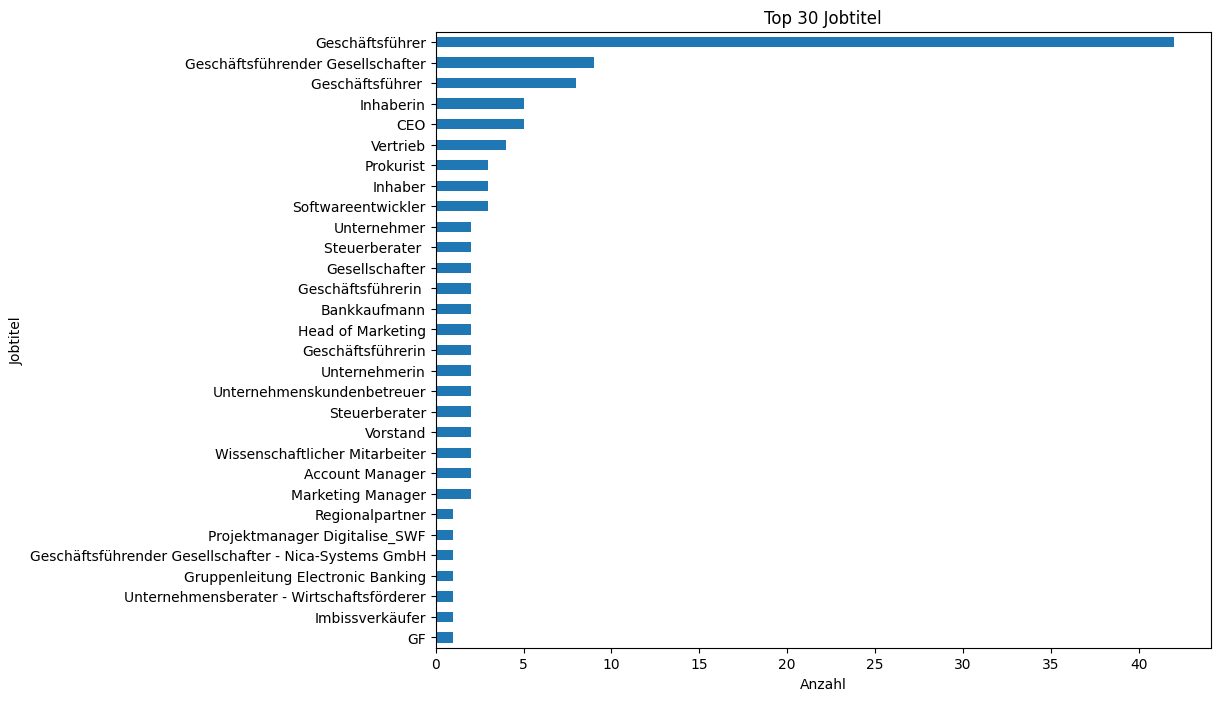

In [ ]:
import matplotlib.pyplot as plt

# Plot the top 30 most frequent job titles as a horizontal bar chart.
# head(30) limits the visualization to the 30 highest counts.
jobtitle_counts.head(30).plot(kind="barh", figsize=(10, 8))

# Set chart title and axis labels.
plt.title("Top 30 Jobtitel")
plt.xlabel("Anzahl")
plt.ylabel("Jobtitel")

# Invert y-axis to display the highest values at the top.
plt.gca().invert_yaxis()

# Render the plot.
plt.show()

## Bereinigen der Daten

In [ ]:
import os, re, warnings, math, unicodedata
import numpy as np
import pandas as pd
from pathlib import Path

# Suppress warnings to keep notebook/log output clean.
warnings.filterwarnings("ignore")

# ------------------------------------------------------------------
# Abbreviation normalization map
# Maps common abbreviations to their expanded canonical form.
# Regex word boundaries (\b) ensure exact token matching.
# ------------------------------------------------------------------
ABBREV_MAP = {
    r"\bgf\b": "geschäftsführer",
    r"\bceo\b": "geschäftsführer",
    r"\bcfo\b": "finanzleiter",
    r"\bcto\b": "technischer leiter",
    r"\bcoo\b": "betriebsleiter",
    r"\bvp\b": "vice president",
    r"\bpm\b": "projektmanager",
    r"\bpo\b": "product owner",
    r"\bhr\b": "human resources",
    r"\bit\b": "it",
    r"\bacct\b": "accounting",
    r"\bmkting\b": "marketing",
    r"\bgmbh\b": "gmbh",
    r"\bag\b": "ag",
}

# ------------------------------------------------------------------
# Canonicalization map
# Normalizes common spelling variations and synonyms
# to a consistent canonical representation.
# ------------------------------------------------------------------
CANON_MAP = {
    "geschaeftsfuehrer": "geschäftsführer",
    "geschäftsführerin": "geschäftsführer",
    "geschaeftsfuehrerin": "geschäftsführer",
    "leiterin": "leiter",
    "head of": "leiter",
    "teamlead": "teamleiter",
    "team lead": "teamleiter",
    "team-lead": "teamleiter",
    "projektleiterin": "projektleiter",
    "projekt manager": "projektmanager",
    "scrum master": "scrum-master",
    "developer": "entwickler",
    "software developer": "softwareentwickler",
    "software engineer": "softwareentwickler",
    "ui designer": "ux/ui designer",
    "ux designer": "ux/ui designer",
    "verkauf": "vertrieb",
    "sales": "vertrieb",
}

def normalize_spaces(s: str) -> str:
    """
    Collapse multiple whitespace characters into a single space
    and trim leading/trailing whitespace.
    """
    return re.sub(r"\s+", " ", s).strip()

def clean_job_title(title: str) -> str:
    """
    Normalize and canonicalize a raw job title string.

    Steps:
    - Validate input (non-empty string, not numeric-only)
    - Lowercase normalization
    - Remove separators and special characters
    - Expand abbreviations via ABBREV_MAP
    - Canonicalize frequent variants via CANON_MAP
    - Normalize whitespace
    """
    if not isinstance(title, str) or not title.strip():
        return ""
    if title.isdigit():
        return ""

    s = title.lower().strip()

    # Soft character and separator normalization.
    s = re.sub(r"[|/\\\[\]\(\),;:]+", " ", s)
    s = normalize_spaces(s)

    # Apply abbreviation expansion (regex-based).
    for pat, repl in ABBREV_MAP.items():
        s = re.sub(pat, repl, s)

    # Apply canonical replacements (string-based).
    for k, v in CANON_MAP.items():
        s = s.replace(k, v)

    return normalize_spaces(s)

# ------------------------------------------------------------------
# Create a working DataFrame with raw and cleaned job titles.
# ------------------------------------------------------------------
jt = expert_df[["id", "jobTitle"]].rename(columns={"jobTitle": "raw_jobTitle"}).copy()

# Apply cleaning pipeline.
jt["jobTitle_clean"] = jt["raw_jobTitle"].apply(clean_job_title)

# Filter out empty cleaned titles,
# ensure uniqueness per id,
# and reset index for clean downstream processing.
jt = (
    jt[~jt["jobTitle_clean"].eq("")]
    .drop_duplicates(subset=["id"])
    .reset_index(drop=True)
)

# Sample preview for validation/debugging.
print(jt.sample(10, random_state=42))
print(f"Bereinigt: {len(jt)} Einträge")

# Optional: Persist cleaned results to disk.
# jt.to_csv(DATA_PATH / "jobtitles_clean.csv", index=False)

                           id  \
9    65b003613897d6f0e6512a80   
164  665ef38ad89259daa7080a70   
139  66292571b5bb2b1c9a99a807   
46   65b6a3463897d6f0e6530c6c   
94   65dc9af861580d8db502ca8f   
101  65f1f9d8763465cfa7e0d671   
84   65d64dae61580d8db5016c17   
275  6737047d51c382bea61204d2   
315  67f629d84c8319387377bdd5   
219  66bb5db90e9f33c69a898791   

                                          raw_jobTitle  \
9                                        Steuerberater   
164                                    Geschäftsführer   
139                                Senior Art Director   
46                                     Geschäftsführer   
94                                     Geschäftsführer   
101            Wirtschaftsförderung Stadt Lüdenscheid    
84                                  Geschäftsführerin    
275  Freier Redner • Coach • Supervisorischer Begle...   
315                                           Vertrieb   
219                    Assistenz Öffentlichkeitsarbeit  

## Semantisches Clustering

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN, KMeans

def embed_jobtitles(texts):
    """
    Return (embeddings, backend_name).
    """
    try:
        # SentenceTransformer-based embedding (cosine-normalized).
        from sentence_transformers import SentenceTransformer
        model = SentenceTransformer("T-Systems-onsite/cross-en-de-roberta-sentence-transformer")
        E = model.encode(texts, show_progress_bar=False, normalize_embeddings=True)
        return E, "cross-en-de-roberta-sentence-transformer"
    except Exception:
        pass


# Generate embeddings for cleaned job titles.
embeddings, backend = embed_jobtitles(jt["jobTitle_clean"].tolist())


def try_dbscan(emb, eps_values=(0.4, 0.6, 0.8), min_samples=4):
    # Evaluate DBSCAN over multiple eps values and select best silhouette score.
    best = None
    for eps in eps_values:
        labels = DBSCAN(eps=eps, min_samples=min_samples, metric="cosine").fit_predict(emb)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

        sil = -1.0
        if n_clusters >= 2:
            try:
                sil = silhouette_score(emb, labels, metric="cosine")
            except Exception:
                pass

        cand = (sil, eps, labels, n_clusters)
        if best is None or cand[0] > best[0]:
            best = cand

    return best  # (silhouette, eps, labels, n_clusters)


def try_kmeans(emb, k_range=range(4, 9)):
    # Evaluate KMeans over a range of k values and select best silhouette score.
    best = None
    for k in k_range:
        km = KMeans(n_clusters=k, n_init=10, random_state=42)
        labels = km.fit_predict(emb)
        sil = silhouette_score(emb, labels, metric="cosine") if k > 1 else -1.0

        cand = (sil, k, labels)
        if best is None or cand[0] > best[0]:
            best = cand

    return best  # (silhouette, k, labels)


# Run clustering experiments.
db_sil, db_eps, db_labels, db_n = try_dbscan(embeddings)
km_sil, km_k, km_labels = try_kmeans(embeddings)


# Select clustering method with higher silhouette score.
if db_sil >= km_sil:
    cluster_method = f"dbscan_eps{db_eps:.2f}"
    labels = db_labels
    n_clusters = db_n
    sil_used = db_sil
else:
    cluster_method = f"kmeans_k{km_k}"
    labels = km_labels
    n_clusters = len(np.unique(labels))
    sil_used = km_sil


# Attach clustering metadata to DataFrame.
jt_clustered = jt.copy()
jt_clustered["cluster_label"] = labels
jt_clustered["cluster_method"] = cluster_method
jt_clustered["embedding_backend"] = backend
jt_clustered["embedding_dim"] = embeddings.shape[1]


# Preview clustered samples and report summary metrics.
print(jt_clustered[["jobTitle_clean", "cluster_label"]].sample(10, random_state=7))
print(f"Clustering: {cluster_method} | backend={backend} | silhouette={sil_used:.3f} | clusters={n_clusters}")


# Optional: persist results.
jt_clustered.to_csv(PATH + "jobtitles_clustered.csv", index=False)

## Kategorisieren von Jobtitles

In [ ]:
jt_clustered = pd.read_csv(PATH + "jobtitles_clustered.csv")

In [ ]:
import re
import pandas as pd

RULES = [
    # 1) Unternehmer & Inhaber
    ("Unternehmer & Inhaber",
     r"(inhaber(in)?|gründer(in)?|unternehmer(in)?|business\s*owner|selbstständig|partner(in)?)"),

    # 2) Geschäftsführung
    ("Geschäftsführung",
     r"(geschäftsführer(in)?|ceo|vorstand|gesellschafter(in)?|prokurist(in)?|chief\b|wirtschaftsförder\w*|geschäftsführung|venture)"),

    # 3) Management & Leitung
    ("Management & Leitung",
     r"(manager(in)?|management|leitung|leiter(in)?|head)"),

    # 4) Personal & Organisation
    ("Personal & Organisation",
     r"(personal|recruit\w*|employee\b|bem\b|assistenz)"),

    # 5) Beratung & Coaching
    ("Beratung & Coaching",
     r"(berater(in)?|consultant|coach|trainer(in)?|mentor(in)?|beratung|vermittlung)"),

    # 6) Finanzen & Controlling
    ("Finanzen & Controlling",
     r"(steuer\w*|finanz\w*|buchhalt\w*|controlling|bank\w*|analyst\w*|risk\w*|investor(in)?)"),

    # 7) Recht
    ("Recht",
     r"(anwalt|anwält\w+|jurist\w*)"),

    # 8) Marketing & Kommunikation
    ("Marketing & Kommunikation",
     r"(marketing|media\b|content|kommunikation|branding|medien|sprecherin|sprecher)"),

    # 9) Bildung & Forschung
    ("Bildung & Forschung",
     r"(dozent(in)?|wissenschaft\w*|forscher(in)?|akademie|lehrer(in)?|futurologe\w*|student(in)?|researcher|professor(in)?)"),

    # 10) Vertrieb & Kundenbetreuung
    ("Vertrieb & Kundenbetreuung",
     r"(sales|vertrieb|kunde(n|nbetreuung)?|relationship|business[\s-]*development|referent(in)?|technischer\s*aussendienst|versicherungsfachmann|geschäftsstelle)"),

    # 11) Handwerk & Produktion
    ("Handwerk & Produktion",
     r"(maler(in)?|techniker(in)?|handwerk\w*|meister(in)?|produktion\w*|schweißer(in)?|schlosser(in)?|öffentlichkeitsarbeit|herstellung|oberflächenfeinbearbeitung)"),

    # 12) Architektur, Bau & Immobilien
    ("Architektur, Bau & Immobilien",
     r"(architekt(in)?|bau\b|bau\w+|immobilien\w*|sachverständiger|sachverständige|ingenieur(in)?)"),

    # 13) Kreative & Sonstige
    ("Kreative & Sonstige",
     r"(fotograf(in)?|event\w*|kreativ\w*|künstler(in)?|foto\b|art\b|design\w*)"),

    # 14) Medizin & Gesundheit
    ("Medizin & Gesundheit",
     r"(psychotherapie\w*)"),

    # 15) IT & Softwareentwicklung
    ("IT & Softwareentwicklung",
     r"(software|informationstechnik|developer|entwickler(in)?|engineer|systemadmin\w*|devops|cto\b|informatik)"),

    # 16) Gastronomie
    ("Gastronomie",
     r"(imbiss)"),
]

def map_category(title: str):
    # Return first matching category based on regex rules.
    for cat, pat in RULES:
        if re.search(pat, title, flags=re.IGNORECASE):
            return cat, pat
    return "Sonstiges", None


# Apply rule-based category mapping to clustered job titles.
jt_mapped = jt_clustered.copy()
jt_mapped[["category", "category_rule"]] = jt_mapped["jobTitle_clean"].apply(
    lambda x: pd.Series(map_category(x))
)

print(jt_mapped)


# Aggregate counts per category.
cat_counts = (
    jt_mapped.groupby("category")
    .agg(n=("id", "count"))
    .sort_values("n", ascending=False)
)
display(cat_counts)


# Show up to five example job titles per category.
examples = (
    jt_mapped.groupby("category")["jobTitle_clean"]
    .apply(lambda s: "; ".join(s.head(5)))
)
display(examples)

                           id                                 raw_jobTitle  \
0    65acfb5a3897d6f0e6506db1                           Softwareentwickler   
1    65ad7c463897d6f0e6508e88                Administrator, Projektmanager   
2    65ae1a393897d6f0e650af77  Relationship-Manager (Gründung & Nachfolge)   
3    65ae1e933897d6f0e650b27f        Firmenkundenbetreuung - Startup Coach   
4    65ae55293897d6f0e650c53d                              Geschäftsführer   
..                        ...                                          ...   
324  6866da2e7531f212ba4def45            Organisationsentwickler / Partner   
325  68676bb97531f212ba4e5ac1                      Senior Sales Consultant   
326  686cef287531f212ba52a273                                Teamassistenz   
327  686e5c6db1e17e69a9cb8b53                               Gesellschafter   
328  686e5c9db1e17e69a9cb8ba7                              Geschäftsführer   

                                jobTitle_clean  cluster_label c

,n
category,
Geschäftsführung,109
Management & Leitung,61
Unternehmer & Inhaber,37
Beratung & Coaching,30
Vertrieb & Kundenbetreuung,15
Sonstiges,11
Handwerk & Produktion,10
Marketing & Kommunikation,9
Bildung & Forschung,9


,jobTitle_clean
category,
"Architektur, Bau & Immobilien",architekt; immobilienkaufmann sachverständiger...
Beratung & Coaching,firmenkundenbetreuung - startup coach; steuerb...
Bildung & Forschung,researcher; professor; wissenschaftlicher mita...
Finanzen & Controlling,executive director finance & controlling; bank...
Gastronomie,imbissverkäufer
Geschäftsführung,geschäftsführer; geschäftsführer; ux/ui design...
Handwerk & Produktion,maler und lackierer allround handwerker; hörak...
IT & Softwareentwicklung,softwareentwickler; softwareentwickler; webent...
Kreative & Sonstige,eventverleih-mk; start- up founder; fotokünstl...


In [ ]:
# Extract job title and assigned category from mapped DataFrame.
jt_mapping_overview = jt_mapped[["jobTitle_clean", "category"]].copy()

# Rename column for clearer external representation.
jt_mapping_overview = jt_mapping_overview.rename(columns={"jobTitle_clean": "jobTitle"})

# Sort by category and job title for structured overview.
jt_mapping_overview = jt_mapping_overview.sort_values(["category", "jobTitle"])

# Display result and optionally persist to CSV.
display(jt_mapping_overview)
jt_mapping_overview.to_csv(PATH + "jobtitles_mapping_overview.csv", index=False)

,jobTitle,category
14,architekt,"Architektur, Bau & Immobilien"
38,immobilienkaufmann sachverständiger,"Architektur, Bau & Immobilien"
264,trockenbau,"Architektur, Bau & Immobilien"
80,bankbetriebswirtin geschäftskundenberaterin,Beratung & Coaching
293,berater,Beratung & Coaching
...,...,...
236,vertrieb,Vertrieb & Kundenbetreuung
315,vertrieb,Vertrieb & Kundenbetreuung
224,vertrieb id + ad,Vertrieb & Kundenbetreuung
279,vertriebsbeauftragter,Vertrieb & Kundenbetreuung


In [ ]:
# Filter entries belonging to the specified category
# and select the cleaned job title column.
sonstiges_titles = jt_mapped[
    jt_mapped['category'] == 'Handwerk & Produktion'
]['jobTitle_clean']

# Extract unique values, convert to list, and sort alphabetically.
unique_sonstiges_titles = sorted(sonstiges_titles.unique().tolist())

# Output unique job titles and total count.
print(unique_sonstiges_titles)
print(f"\nAnzahl einzigartiger Jobtitel in der Kategorie 'Sonstiges': {len(unique_sonstiges_titles)}")

['betriebsschlosser und erfinder', 'feinwerkmechaniker meister', 'fotografenmeister', 'gebäudereinigermeister', 'herstellung von kaltgewalztem flachdraht', 'hörakustikmeisterin', 'maler und lackierer allround handwerker', 'oberflächenfeinbearbeitung', 'schreinermeister', 'öffentlichkeitsarbeit statistik & konjunktur']

Anzahl einzigartiger Jobtitel in der Kategorie 'Sonstiges': 10


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Compute frequency distribution of categories.
category_counts = jt_mapped["category"].value_counts()

# Print counts for validation.
print(category_counts)

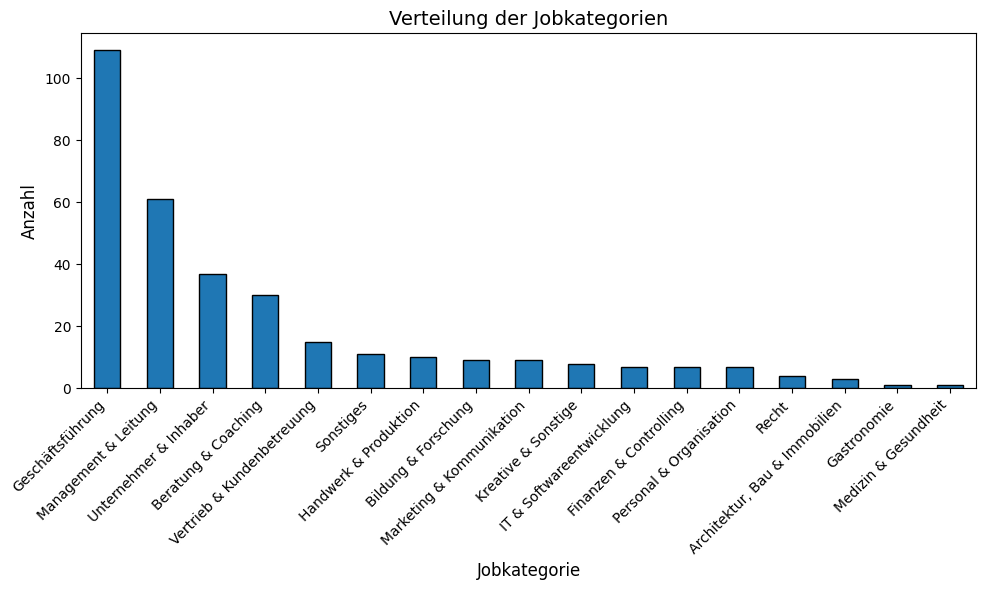

In [ ]:
# Create figure with fixed size for consistent layout.
plt.figure(figsize=(10, 6))

# Plot category distribution as bar chart.
category_counts.plot(kind="bar", edgecolor="black")

# Configure title and axis labels.
plt.title("Verteilung der Jobkategorien", fontsize=14)
plt.xlabel("Jobkategorie", fontsize=12)
plt.ylabel("Anzahl", fontsize=12)

# Rotate x-axis labels for readability.
plt.xticks(rotation=45, ha="right")

# Adjust layout to prevent label clipping.
plt.tight_layout()

# Render plot.
plt.show()

# Analyse der branches

In [ ]:
# Count profiles where 'branches' is a non-empty list.
# Ensures value is of type list and contains at least one element.
count_with_branches = expert_df['branches'].apply(
    lambda x: isinstance(x, list) and len(x) > 0
).sum()

# Output total number of profiles with at least one branch assigned.
print(f"Anzahl der Profile mit einer Branche: {count_with_branches}")

Anzahl der Profile mit einer Branche: 316


In [ ]:
import itertools

# Flatten all branch lists into a single list.
# - dropna() removes missing values
# - ensure only list-type entries are processed
all_branches = list(
    itertools.chain.from_iterable(
        expert_df["branches"]
        .dropna()
        .apply(lambda x: x if isinstance(x, list) else [])
    )
)

# Extract distinct branch names and sort alphabetically.
unique_branches = sorted(set(all_branches))

# Output total count and preview.
print("Anzahl unterschiedlicher Branchen:", len(unique_branches))
print("Beispielausgabe (erste 20 Branchen):")
print(unique_branches[:20])

Anzahl unterschiedlicher Branchen: 20
Beispielausgabe (erste 20 Branchen):
['Automobilindustrie', 'Bau und Infrastruktur', 'Bergbau', 'Bildung und Weiterbildung', 'Chemie und Kunststoff', 'Energie und Umwelt', 'Gesundheitswesen', 'Handwerk', 'Immobilien', 'Investor (Eigenkapital)', 'Konsum und Handel', 'Land- und Forstwirtschaft', 'Logistik', 'Maschinenbau und Industrieprodukte', 'Medien & Werbung', 'Reisen und Unterhaltung', 'Technologie', 'Unternehmensdienstleistungen', 'Verpackungsindustrie', 'Wissenschaft und Forschung']


In [ ]:
from collections import Counter
import itertools

# Flatten branch lists into a single list.
# - dropna() removes missing values
# - ensure only list-type entries are included
all_branches = list(
    itertools.chain.from_iterable(
        expert_df["branches"]
        .dropna()
        .apply(lambda x: x if isinstance(x, list) else [])
    )
)

# Count frequency of each branch.
branch_counts = Counter(all_branches)

# Retrieve top N most frequent branches.
top_n = 30
top_branches = branch_counts.most_common(top_n)

# Convert to DataFrame for structured analysis/output.
branches_df = pd.DataFrame(top_branches, columns=["Branche", "Anzahl"])

print(branches_df)

                               Branche  Anzahl
0         Unternehmensdienstleistungen     177
1                          Technologie     104
2                     Medien & Werbung      71
3                   Automobilindustrie      68
4                Bau und Infrastruktur      62
5   Maschinenbau und Industrieprodukte      58
6                   Energie und Umwelt      57
7              Investor (Eigenkapital)      55
8                           Immobilien      51
9              Reisen und Unterhaltung      40
10                    Gesundheitswesen      37
11                            Logistik      31
12                Verpackungsindustrie      29
13           Bildung und Weiterbildung      27
14               Chemie und Kunststoff      27
15                             Bergbau      25
16          Wissenschaft und Forschung      24
17                            Handwerk      22
18                   Konsum und Handel      16
19           Land- und Forstwirtschaft       6


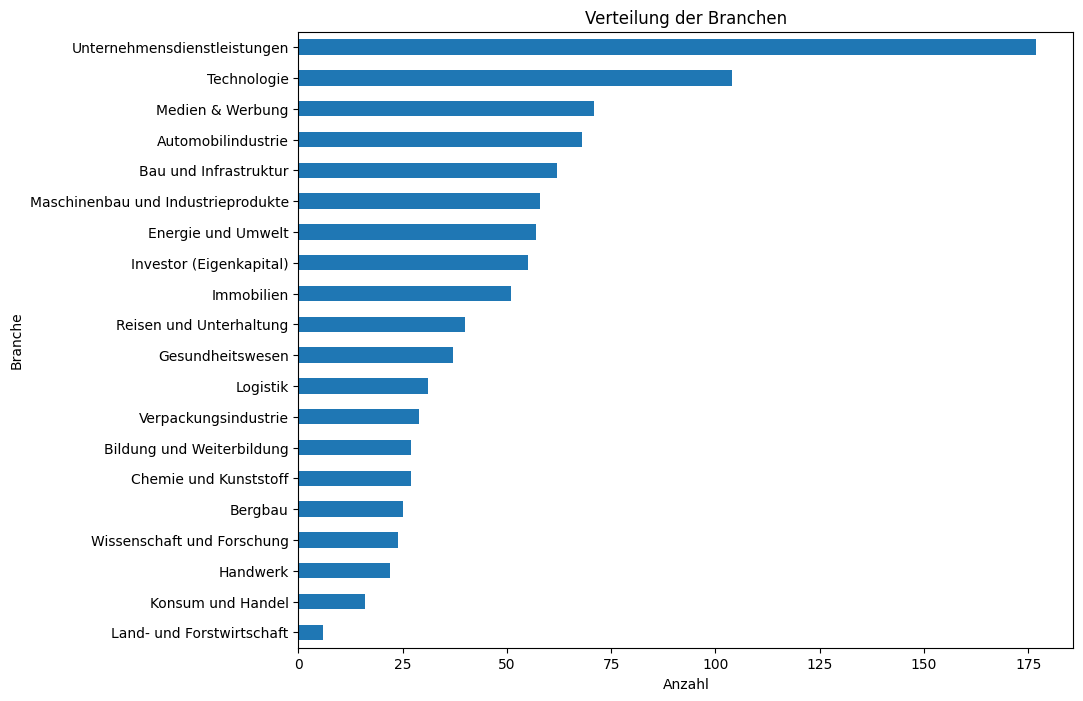

In [ ]:
import matplotlib.pyplot as plt

# Plot branch distribution as horizontal bar chart.
# Index is set to branch name for proper labeling.
branches_df.set_index("Branche").plot(
    kind="barh",
    figsize=(10, 8),
    legend=False
)

# Configure title and axis labels.
plt.title("Verteilung der Branchen")
plt.xlabel("Anzahl")
plt.ylabel("Branche")

# Invert y-axis so the most frequent branch appears at the top.
plt.gca().invert_yaxis()

# Render plot.
plt.show()

In [ ]:
# Return number of branches for a given profile.
# Non-list or missing values are treated as zero.
def count_branches_per_profile(branches_list):
    if isinstance(branches_list, list):
        return len(branches_list)
    return 0


# Filter profiles that contain at least one branch.
expert_df_with_branches = expert_df[
    expert_df['branches'].apply(lambda x: isinstance(x, list) and len(x) > 0)
]

# Compute median number of branches per profile (excluding zero-branch profiles).
average_branches_per_profile = (
    expert_df_with_branches['branches']
    .apply(count_branches_per_profile)
    .median()
)

# Output result.
print(f"Durchschnittliche Anzahl der Branchen pro Expertenprofil: {average_branches_per_profile:.2f}")

Durchschnittliche Anzahl der Branchen pro Expertenprofil: 3.12


Verteilung der Anzahl der Branchen pro Profil:
branches
1     123
2      73
3      70
4       1
5       1
8      25
13     23
Name: count, dtype: int64


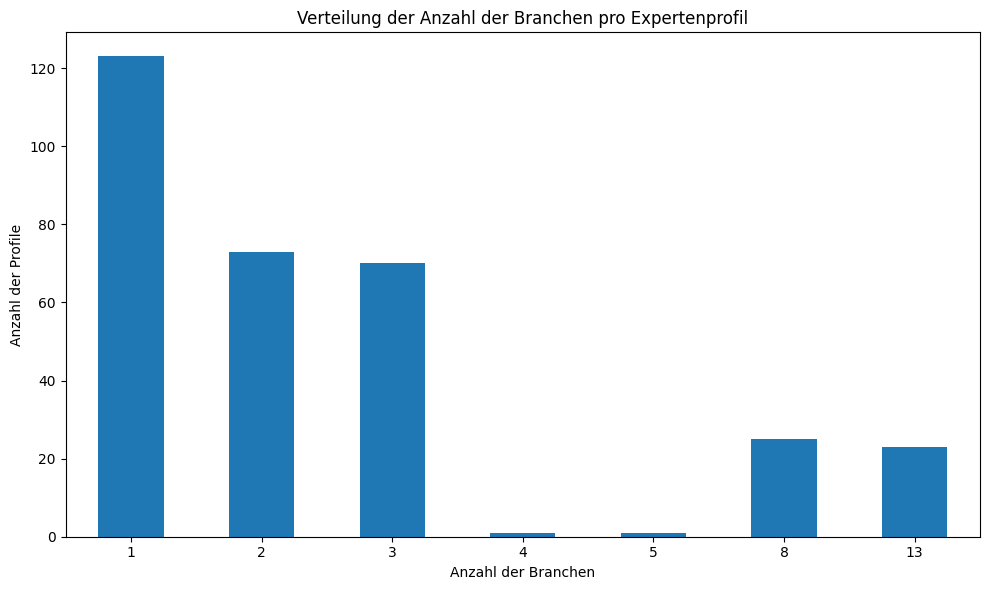

In [ ]:
import matplotlib.pyplot as plt

# Return number of branches for a given profile.
# Non-list or missing values are treated as zero.
def count_branches_per_profile(branches_list):
    if isinstance(branches_list, list):
        return len(branches_list)
    return 0


# Filter profiles that contain at least one branch.
expert_df_with_branches = expert_df[
    expert_df['branches'].apply(lambda x: isinstance(x, list) and len(x) > 0)
]

# Compute distribution of branch counts per profile.
branch_counts_per_profile = (
    expert_df_with_branches['branches']
    .apply(count_branches_per_profile)
    .value_counts()
    .sort_index()
)

print("Verteilung der Anzahl der Branchen pro Profil:")
print(branch_counts_per_profile)

# Visualize distribution as bar chart.
plt.figure(figsize=(10, 6))
branch_counts_per_profile.plot(kind='bar')

# Configure title and axis labels.
plt.title('Verteilung der Anzahl der Branchen pro Expertenprofil')
plt.xlabel('Anzahl der Branchen')
plt.ylabel('Anzahl der Profile')

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
from collections import Counter
import itertools

# Generate sorted branch combinations (size >= 2) per profile.
# Non-list values or lists with fewer than two elements return an empty list.
def get_branch_combinations(branches_list):
    if not isinstance(branches_list, list) or len(branches_list) < 2:
        return []

    # Sort to ensure order-independent combination counting.
    sorted_branches = sorted(branches_list)

    # Generate all combinations of size 2..n.
    combinations = []
    for i in range(2, len(sorted_branches) + 1):
        combinations.extend(itertools.combinations(sorted_branches, i))

    return combinations


# Collect all branch combinations across profiles.
all_combinations = list(
    itertools.chain.from_iterable(
        expert_df["branches"].apply(get_branch_combinations)
    )
)

print(all_combinations)

# Count frequency of each branch combination.
combination_counts = Counter(all_combinations)

# Retrieve top N most frequent combinations.
top_n = 30
top_combinations = combination_counts.most_common(top_n)

# Convert to DataFrame for structured analysis/output.
combinations_df = pd.DataFrame(
    top_combinations,
    columns=["Branchen-Kombination", "Anzahl"]
)

print("Häufigsten Branchen-Kombinationen:")
print(combinations_df)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from collections import Counter
import itertools
import pandas as pd
import numpy as np

# Extract top 20 branches based on previous frequency analysis.
top_branches = branches_df["Branche"].tolist()[:20]

# Initialize symmetric co-occurrence matrix (zero-filled).
co_occurrence_matrix = pd.DataFrame(
    0,
    index=top_branches,
    columns=top_branches
)

# Update co-occurrence counts for a single profile.
def process_profile_branches(branches_list):
    if isinstance(branches_list, list) and len(branches_list) > 1:

        # Keep only branches that are part of the top 20.
        profile_top_branches = [
            branch for branch in branches_list
            if branch in top_branches
        ]

        # Increment pairwise co-occurrence counts.
        for branch1, branch2 in itertools.combinations(profile_top_branches, 2):
            co_occurrence_matrix.loc[branch1, branch2] += 1
            co_occurrence_matrix.loc[branch2, branch1] += 1


# Apply processing to each profile.
expert_df["branches"].apply(process_profile_branches)

# Set diagonal to absolute branch frequencies.
for branch in top_branches:
    co_occurrence_matrix.loc[branch, branch] = (
        branches_df[branches_df["Branche"] == branch]["Anzahl"].iloc[0]
    )

print("Top 20 Branchen Co-Occurrence Matrix:")
display(co_occurrence_matrix)

Top 20 Branchen Co-Occurrence Matrix:


,Unternehmensdienstleistungen,Technologie,Medien & Werbung,Automobilindustrie,Bau und Infrastruktur,Maschinenbau und Industrieprodukte,Energie und Umwelt,Investor (Eigenkapital),Immobilien,Reisen und Unterhaltung,Gesundheitswesen,Logistik,Verpackungsindustrie,Bildung und Weiterbildung,Chemie und Kunststoff,Bergbau,Wissenschaft und Forschung,Handwerk,Konsum und Handel,Land- und Forstwirtschaft
Unternehmensdienstleistungen,177,49,46,28,30,19,27,52,44,30,25,26,0,27,1,0,24,7,6,0
Technologie,49,104,29,51,48,31,51,24,23,23,24,24,25,23,26,25,23,0,4,0
Medien & Werbung,46,29,71,24,23,3,23,24,23,29,24,24,0,27,0,0,23,0,1,0
Automobilindustrie,28,51,24,68,49,32,49,23,23,23,23,23,25,23,25,25,23,1,0,0
Bau und Infrastruktur,30,48,23,49,62,28,49,23,23,23,23,23,25,23,25,25,23,7,1,0
Maschinenbau und Industrieprodukte,19,31,3,32,28,58,28,0,0,0,0,1,29,0,25,25,0,7,5,0
Energie und Umwelt,27,51,23,49,49,28,57,23,23,23,23,23,25,23,25,25,23,0,0,0
Investor (Eigenkapital),52,24,24,23,23,0,23,55,43,23,24,23,0,23,0,0,23,0,0,0
Immobilien,44,23,23,23,23,0,23,43,51,24,23,23,0,23,0,0,23,0,0,0
Reisen und Unterhaltung,30,23,29,23,23,0,23,23,24,40,24,24,0,23,0,0,23,0,1,0


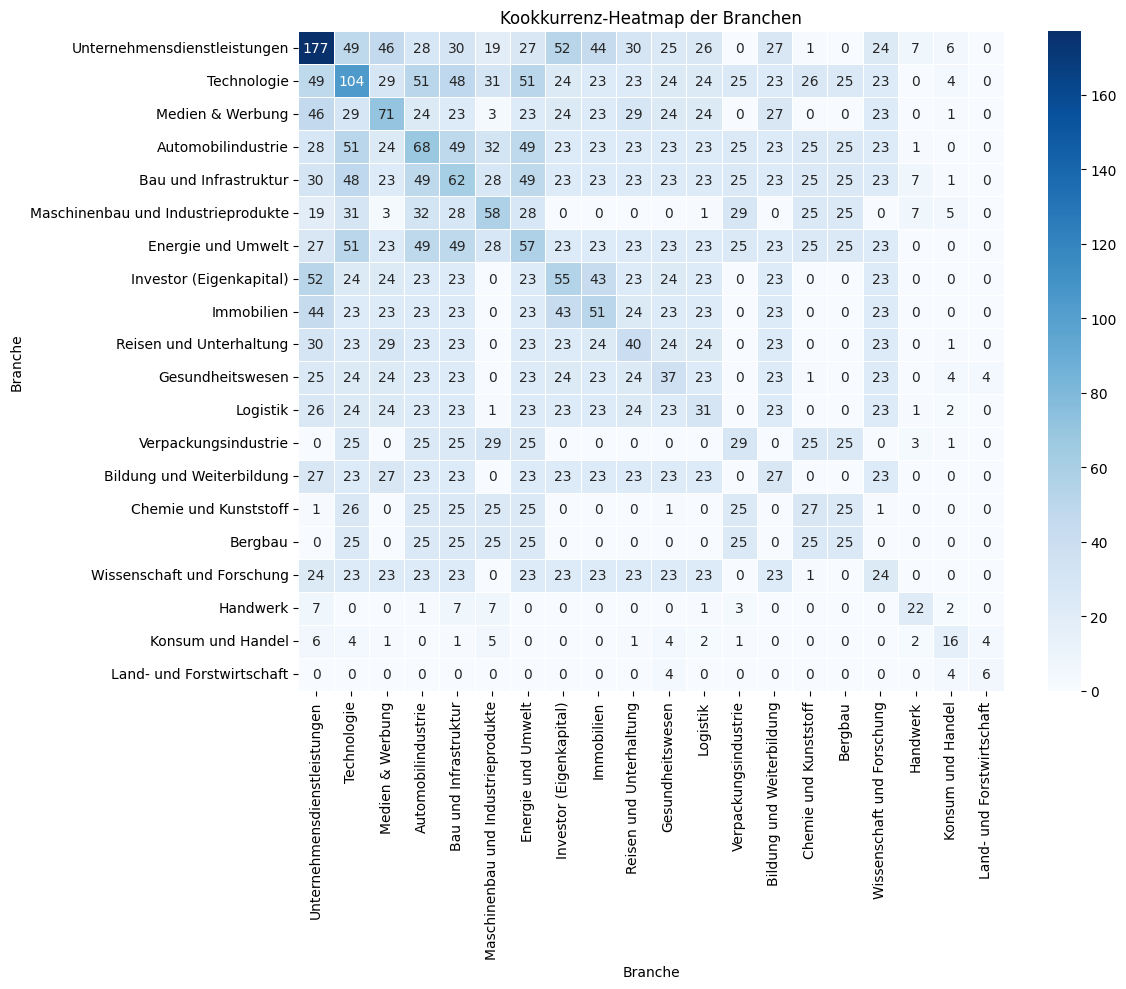

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create figure for co-occurrence heatmap.
plt.figure(figsize=(12, 10))

# Plot heatmap with integer annotations and blue color scale.
sns.heatmap(
    co_occurrence_matrix,
    annot=True,
    fmt='d',
    cmap='Blues',
    linewidths=.5
)

# Configure title and axis labels.
plt.title('Kookkurrenz-Heatmap der Branchen')
plt.xlabel('Branche')
plt.ylabel('Branche')

# Adjust tick label rotation for readability.
plt.xticks(rotation=90)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

# Analyse der skills


In [ ]:
# Count profiles where 'skills' is a non-empty list.
# Ensures value is of type list and contains at least one element.
count_with_skills = expert_df['skills'].apply(
    lambda x: isinstance(x, list) and len(x) > 0
).sum()

# Output total number of profiles with at least one skill assigned.
print(f"Anzahl der Profile mit Skills: {count_with_skills}")

Anzahl der Profile mit Skills: 285


In [ ]:
import itertools

# Flatten skill lists into a single list.
# - dropna() removes missing values
# - ensure only list-type entries are processed
all_skills = list(
    itertools.chain.from_iterable(
        expert_df["skills"]
        .dropna()
        .apply(lambda x: x if isinstance(x, list) else [])
    )
)

# Extract distinct skills and sort alphabetically.
unique_skills = sorted(set(all_skills))

# Output total number of skill entries (including duplicates).
print("Anzahl unterschiedlicher Branchen:", len(all_skills))

# Output unique skills and total count.
print("Beispielausgabe (erste 20 skills):")
print(unique_skills)
print(len(unique_skills))

Anzahl unterschiedlicher Branchen: 2152
Beispielausgabe (erste 20 skills):
['AI-gestützte Kundenbetreuung (Chatbots)', 'Accounting', 'Adobe Creative Cloud', 'Ambulanzmanagement (LabCentre)', 'Anlagenbau', 'Antriebstechnik', 'Asset Management', 'Autodesk Inventor', 'Automatisierte Produktions- & Montagelinien', 'Automatisierungstechnik', 'Bau- und Ausbauhandwerk', 'Bauinformatik', 'Bedrucken & Lackieren von Metalloberflächen', 'Behavioral Finance', 'Bekleidungs-, Textil- und Lederhandwerk', 'Benchmarking', 'Benutzeroberflächen-Design', 'Beratung & Bildungscoaching', 'Blockchain', 'Brand Management', 'Buchhaltung', 'Budget Control', 'Budget Planning', 'Budgeting', 'Business Analysis', 'Business Continuity', 'Business Development', 'Business English', 'Business Planning', 'Business Process Analysis', 'Business Process Management (BPM) & Automatisierung', 'CAD-Systeme', 'CRM-Plattformen', 'Capacity Planning', 'Change Management', 'Change Management im digitalen Wandel', 'Cloud-Computing', 

In [ ]:
from collections import Counter
import itertools

# Flatten all skill lists into a single list.
# dropna() removes missing values (assumes remaining entries are lists).
all_skills = list(
    itertools.chain.from_iterable(
        expert_df["skills"].dropna()
    )
)

# Count frequency of each skill.
skill_counts = Counter(all_skills)

# Retrieve top N most frequent skills.
# Increase top_n (e.g., to 200) if exporting full distribution.
top_n = 30
top_skills = skill_counts.most_common(top_n)

# Convert to DataFrame for structured output.
skills_df = pd.DataFrame(top_skills, columns=["Skill", "Anzahl"])

print(skills_df)

                               Skill  Anzahl
0               Business Development      96
1                  Change Management      75
2                  Projektmanagement      73
3                          Marketing      71
4                  Business Planning      66
5                           Coaching      54
6                        Controlling      44
7   Customer Relationship Management      42
8                  Strategy Planning      37
9                      Communication      37
10                 Business Analysis      36
11                   Budget Planning      34
12                   Human Resources      34
13              Financial Management      32
14                        Networking      31
15                           Finance      29
16                Content Management      28
17                   Cloud-Computing      27
18            Social Media Marketing      27
19                   Web-Entwicklung      26
20                  Entrepreneurship      25
21        

In [ ]:
# Create DataFrame from extracted top skills.
unique_skills_df = pd.DataFrame(top_skills)

# Optionally persist DataFrame to CSV.
# unique_skills_df.to_csv(PATH + "unique_skills.csv", index=False)

# Confirm export path (if saving is enabled).
print(f"Die einzigartigen Skills wurden erfolgreich in '{PATH}unique_skills.csv' gespeichert.")

Die einzigartigen Skills wurden erfolgreich in 'drive/MyDrive/Uni/Master/Masterthesis/Data/unique_skills.csv' gespeichert.


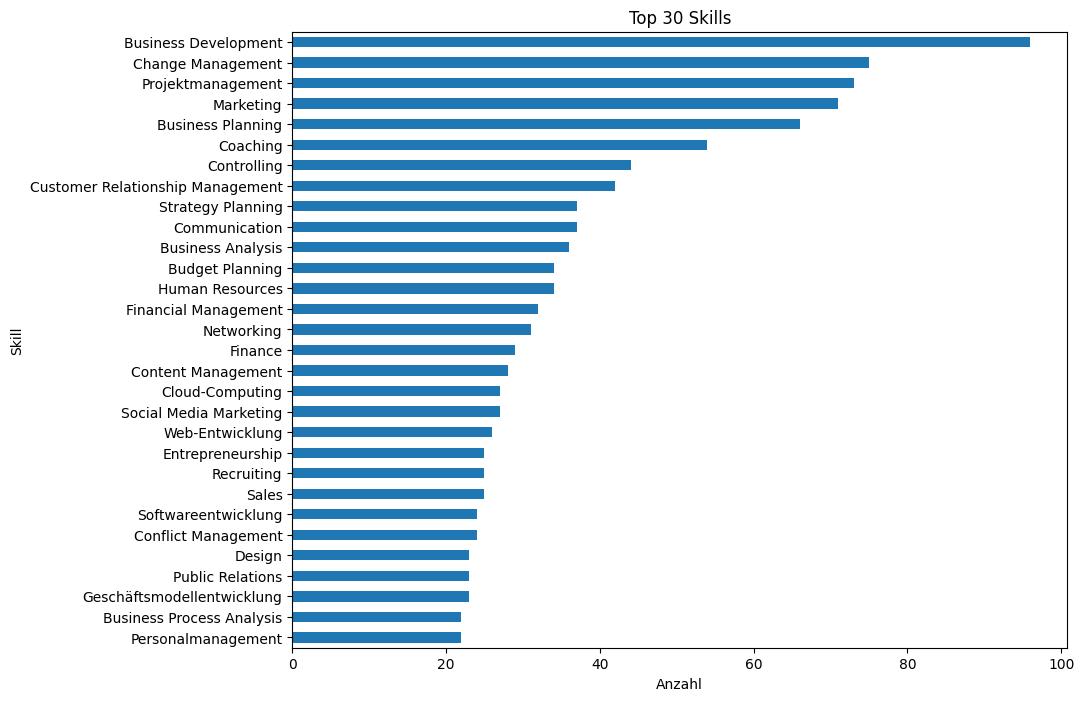

In [ ]:
import matplotlib.pyplot as plt

# Plot top N skills as horizontal bar chart.
# Set skill column as index for labeling.
skills_df.set_index("Skill").plot(
    kind="barh",
    figsize=(10, 8),
    legend=False
)

# Configure title and axis labels.
plt.title(f"Top {top_n} Skills")
plt.xlabel("Anzahl")
plt.ylabel("Skill")

# Invert y-axis so the most frequent skills appear at the top.
plt.gca().invert_yaxis()

# Render plot.
plt.show()

### Clustering


In [ ]:
# Skill normalization pipeline.

import re  # Regex utilities for text normalization


def clean_skill(skill: str) -> str:
    # Return normalized skill string.
    # Invalid or empty inputs are mapped to empty string.
    if not isinstance(skill, str) or not skill.strip():
        return ""

    # Lowercase normalization and trim whitespace.
    s = skill.lower().strip()

    # Replace separators/special characters with space.
    s = re.sub(r"[|/\\\[\]\(\),;:]+", " ", s)

    # Collapse multiple spaces.
    s = re.sub(r"\s+", " ", s).strip()

    return s


# Apply cleaning function to each skill list per profile.
# Non-list values are mapped to empty lists.
expert_df['skills_clean'] = expert_df['skills'].apply(
    lambda skill_list: [clean_skill(s) for s in skill_list]
    if isinstance(skill_list, list)
    else []
)

# Filter profiles with at least one cleaned skill.
expert_df_with_clean_skills = expert_df[
    expert_df['skills_clean'].apply(lambda x: len(x) > 0)
].copy()

# Sample validation output.
print(expert_df_with_clean_skills[['skills', 'skills_clean']].sample(10, random_state=42))
print(f"Bereinigt: {len(expert_df_with_clean_skills)} Einträge mit Skills")

                                                skills  \
10   [Cloud-Computing, Content Management, Digital ...   
305  [Anlagenbau, Installationstechnik, Klempnerarb...   
180                           [Finance, Finanzplanung]   
252                                  [Videoproduktion]   
83   [Projektmanagement, Business Development, Busi...   
281  [Ingenieurwesen, Lebensmittelhandwerk, Product...   
325  [Benchmarking, Budget Planning, Business Devel...   
194  [Coaching, Controlling, Fach- und Methodenkenn...   
46   [Projektmanagement, Vendor Management, Stakeho...   
273  [Bau- und Ausbauhandwerk, Elektroinstallation,...   

                                          skills_clean  
10   [cloud-computing, content management, digital ...  
305  [anlagenbau, installationstechnik, klempnerarb...  
180                           [finance, finanzplanung]  
252                                  [videoproduktion]  
83   [projektmanagement, business development, busi...  
281  [ingenieurwese

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN, KMeans
import numpy as np
import itertools

def embed_skills(texts):
    """
    Gibt (embeddings, backend_name) zurück.
    """
    try:
        from sentence_transformers import SentenceTransformer

        # Use the same embedding model as for job titles to keep representations consistent.
        model = SentenceTransformer("T-Systems-onsite/cross-en-de-roberta-sentence-transformer")
        E = model.encode(texts, show_progress_bar=False, normalize_embeddings=True)
        return E, "cross-en-de-roberta-sentence-transformer"
    except Exception as e:
        # Fail fast with a readable error and signal embedding failure via (None, None).
        print(f"Fehler beim Laden oder Ausführen des SentenceTransformer-Modells: {e}")
        return None, None


def try_dbscan(emb, eps_values=(0.4, 0.6, 0.8), min_samples=4):
    # Sweep eps values and keep the configuration with the best silhouette score.
    best = None
    for eps in eps_values:
        labels = DBSCAN(eps=eps, min_samples=min_samples, metric="cosine").fit_predict(emb)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

        sil = -1.0
        if n_clusters >= 2:
            try:
                sil = silhouette_score(emb, labels, metric="cosine")
            except Exception:
                pass

        cand = (sil, eps, labels, n_clusters)
        if best is None or cand[0] > best[0]:
            best = cand

    return best  # (sil, eps, labels, n_clusters)


def try_kmeans(emb, k_range=range(4, 9)):
    # Sweep k and keep the configuration with the best silhouette score.
    best = None
    for k in k_range:
        km = KMeans(n_clusters=k, n_init=10, random_state=42)
        labels = km.fit_predict(emb)
        sil = silhouette_score(emb, labels, metric="cosine") if k > 1 else -1.0

        cand = (sil, k, labels)
        if best is None or cand[0] > best[0]:
            best = cand

    return best  # (sil, k, labels)


# Flatten cleaned skills across all profiles.
all_clean_skills = list(itertools.chain.from_iterable(expert_df['skills_clean']))

# Embed unique skills only to avoid redundant computation.
unique_clean_skills = sorted(list(set(all_clean_skills)))

# Generate embeddings for the unique skills vocabulary.
embeddings, backend = embed_skills(unique_clean_skills)

if embeddings is not None:
    # Run clustering experiments.
    db_sil, db_eps, db_labels, db_n = try_dbscan(embeddings)
    km_sil, km_k, km_labels = try_kmeans(embeddings)

    # Select clustering method with higher silhouette score.
    if db_sil >= km_sil:
        cluster_method = f"dbscan_eps{db_eps:.2f}"
        labels = db_labels
        n_clusters = db_n
        sil_used = db_sil
    else:
        cluster_method = f"kmeans_k{km_k}"
        labels = km_labels
        n_clusters = len(np.unique(labels))
        sil_used = km_sil

    # Materialize clustered skills and attach clustering metadata.
    skills_clustered = pd.DataFrame({'skill_clean': unique_clean_skills, 'cluster_label': labels})
    skills_clustered["cluster_method"] = cluster_method
    skills_clustered["embedding_backend"] = backend
    skills_clustered["embedding_dim"] = embeddings.shape[1]

    # Quick sanity check output.
    print(skills_clustered.sample(10, random_state=7))
    print(f"Clustering: {cluster_method} | backend={backend} | silhouette={sil_used:.3f} | clusters={n_clusters}")

    # Optional: persist results.
    skills_clustered.to_csv(PATH + "skills_clustered.csv", index=False)
else:
    # Embedding failed; downstream clustering is skipped.
    print("Embedding konnte nicht durchgeführt werden.")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/188 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

                               skill_clean  cluster_label cluster_method  \
191                     wettbewerbsanalyse              6      kmeans_k7   
120                              marketing              5      kmeans_k7   
24                       business analysis              6      kmeans_k7   
117       markenstrategie & positionierung              4      kmeans_k7   
2    ai-gestützte kundenbetreuung chatbots              0      kmeans_k7   
101                   installationstechnik              2      kmeans_k7   
104                          it-management              1      kmeans_k7   
145                     product management              1      kmeans_k7   
86                            gap analysis              6      kmeans_k7   
22                         budget planning              4      kmeans_k7   

                            embedding_backend  embedding_dim  
191  cross-en-de-roberta-sentence-transformer            768  
120  cross-en-de-roberta-sentence-tra

In [ ]:
# CSV-Datei einlesen (Dateiname anpassen)
skills_df = pd.read_csv(PATH + "unique_skills_categorized.csv")
skills_df


,Skills,Kategorie
0,Business Development,Business & Management
1,Change Management,Business & Management
2,Projektmanagement,Business & Management
3,Marketing,Marketing & Kommunikation
4,Business Planning,Business & Management
...,...,...
190,Markenstrategie & Positionierung,Business & Management
191,Marktanalyse,Business & Management
192,Online-Shop-Management & Plattformbetrieb,Business & Management
193,Zielgruppenanalyse & Konsumentenverhalten,Business & Management


In [ ]:
skills_df.to_csv(PATH + "skills_mapping_overview.csv", index=False)

Verteilung der Skill-Kategorien (aus skills_df):
Kategorie
Business & Management             75
IT & Softwareentwicklung          43
Handwerk, Technik & Produktion    31
Marketing & Kommunikation         20
Kreatives & Design                13
Personalwesen & Coaching           8
Sonstiges                          4
Lehre & Forschung                  1
Name: count, dtype: int64


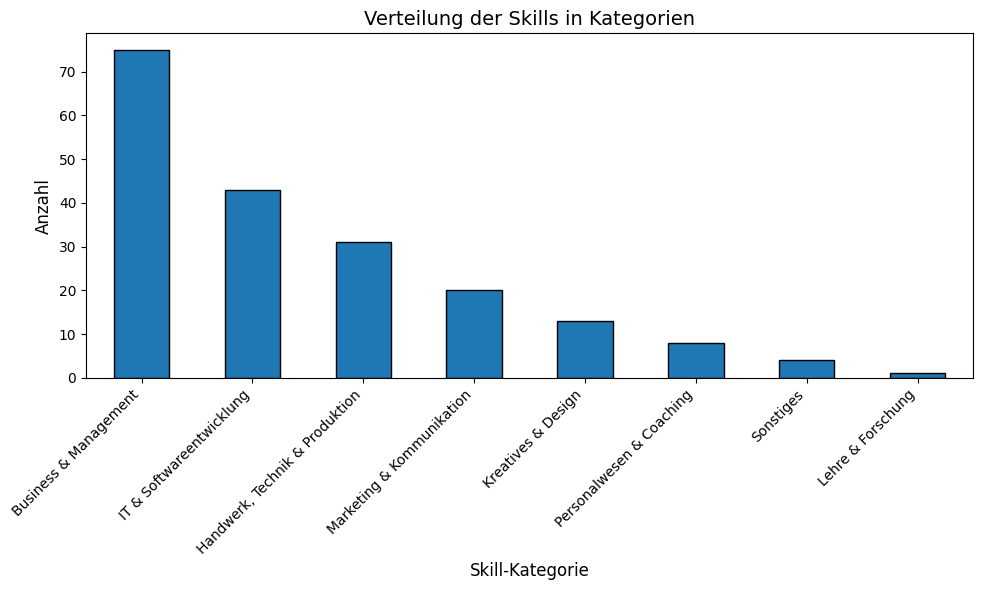

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Compute frequency distribution of skill categories.
category_counts = skills_df['Kategorie'].value_counts()

# Print category counts for validation.
print("Verteilung der Skill-Kategorien (aus skills_df):")
print(category_counts)

# Visualize distribution as bar chart.
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', edgecolor='black')

# Configure title and axis labels.
plt.title('Verteilung der Skills in Kategorien', fontsize=14)
plt.xlabel('Skill-Kategorie', fontsize=12)
plt.ylabel('Anzahl', fontsize=12)

# Rotate x-axis labels for readability.
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [ ]:
# Explode the 'skills' column
expert_df_exploded_skills = expert_df.explode('skills')

# Display the first few rows of the new DataFrame
print(expert_df_exploded_skills.head())

# Display the shape of the new DataFrame compared to the original
print(f"\nOriginal DataFrame shape: {expert_df.shape}")
print(f"DataFrame with exploded skills shape: {expert_df_exploded_skills.shape}")

                                            branches companyLocationCity  \
0  [Technologie, Medien & Werbung, Unternehmensdi...          Lennestadt   
0  [Technologie, Medien & Werbung, Unternehmensdi...          Lennestadt   
0  [Technologie, Medien & Werbung, Unternehmensdi...          Lennestadt   
0  [Technologie, Medien & Werbung, Unternehmensdi...          Lennestadt   
0  [Technologie, Medien & Werbung, Unternehmensdi...          Lennestadt   

  companyLocationStreet  companyLocationZip      companyName  \
0     Hagener Straße 64             57368.0  lenne.Tech GmbH   
0     Hagener Straße 64             57368.0  lenne.Tech GmbH   
0     Hagener Straße 64             57368.0  lenne.Tech GmbH   
0     Hagener Straße 64             57368.0  lenne.Tech GmbH   
0     Hagener Straße 64             57368.0  lenne.Tech GmbH   

       companyTypes      companyWebsite  \
0  [Dienstleistung]  https://lenne.tech   
0  [Dienstleistung]  https://lenne.tech   
0  [Dienstleistung]  https://

In [ ]:
# Merge expert_df_exploded_skills with skills_df based on the 'skills' column
expert_df_categorized_skills = expert_df_exploded_skills.merge(skills_df, left_on='skills', right_on='Skills', how='left')

# Drop the redundant 'Skills' column from the merge
expert_df_categorized_skills = expert_df_categorized_skills.drop('Skills', axis=1)

# Display the first few rows to verify the merge
print(expert_df_categorized_skills.head())

                                            branches companyLocationCity  \
0  [Technologie, Medien & Werbung, Unternehmensdi...          Lennestadt   
1  [Technologie, Medien & Werbung, Unternehmensdi...          Lennestadt   
2  [Technologie, Medien & Werbung, Unternehmensdi...          Lennestadt   
3  [Technologie, Medien & Werbung, Unternehmensdi...          Lennestadt   
4  [Technologie, Medien & Werbung, Unternehmensdi...          Lennestadt   

  companyLocationStreet  companyLocationZip      companyName  \
0     Hagener Straße 64             57368.0  lenne.Tech GmbH   
1     Hagener Straße 64             57368.0  lenne.Tech GmbH   
2     Hagener Straße 64             57368.0  lenne.Tech GmbH   
3     Hagener Straße 64             57368.0  lenne.Tech GmbH   
4     Hagener Straße 64             57368.0  lenne.Tech GmbH   

       companyTypes      companyWebsite  \
0  [Dienstleistung]  https://lenne.tech   
1  [Dienstleistung]  https://lenne.tech   
2  [Dienstleistung]  https://

In [ ]:
# Compute frequency distribution of skill categories
# within expert_df_categorized_skills.
category_counts_categorized_df = (
    expert_df_categorized_skills['Kategorie']
    .value_counts()
)

# Print category counts for validation.
print("Verteilung der Skill-Kategorien in expert_df_categorized_skills:")
print(category_counts_categorized_df)

Verteilung der Skill-Kategorien in expert_df_categorized_skills:
Kategorie
Business & Management             1022
Marketing & Kommunikation          324
IT & Softwareentwicklung           266
Handwerk, Technik & Produktion     231
Personalwesen & Coaching           178
Kreatives & Design                 103
Sonstiges                           17
Lehre & Forschung                   11
Name: count, dtype: int64


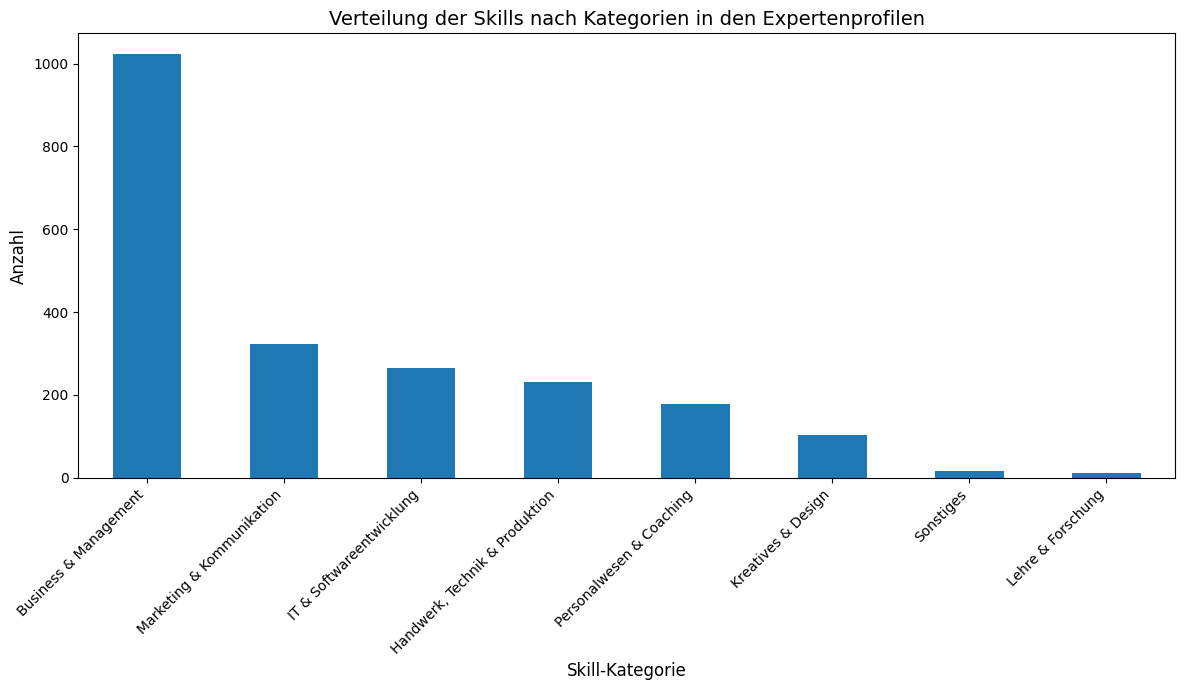

In [ ]:
import matplotlib.pyplot as plt

# Create figure with adjusted size for improved readability.
plt.figure(figsize=(12, 7))

# Plot distribution of categorized skills.
category_counts_categorized_df.plot(kind='bar')

# Configure title and axis labels.
plt.title('Verteilung der Skills nach Kategorien in den Expertenprofilen', fontsize=14)
plt.xlabel('Skill-Kategorie', fontsize=12)
plt.ylabel('Anzahl', fontsize=12)

# Rotate x-axis labels for better legibility.
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent label clipping.
plt.tight_layout()

plt.show()

In [ ]:
# Compute frequency distribution of skill categories.
category_counts = skills_df['Kategorie'].value_counts()

# Print category counts for validation.
print("Verteilung der Skill-Kategorien:")
print(category_counts)

Verteilung der Skill-Kategorien:
Kategorie
Business & Management             75
IT & Softwareentwicklung          43
Handwerk, Technik & Produktion    31
Marketing & Kommunikation         20
Kreatives & Design                13
Personalwesen & Coaching           8
Sonstiges                          4
Lehre & Forschung                  1
Name: count, dtype: int64


### Analyse der Anzahl der skills pro Expertenprofil

In [ ]:
# Return number of skills for a given profile.
# Non-list or missing values are treated as zero.
def count_skills_per_profile(skills_list):
    if isinstance(skills_list, list):
        return len(skills_list)
    return 0


# Filter profiles that contain at least one skill.
expert_df_with_skills = expert_df[
    expert_df['skills'].apply(lambda x: isinstance(x, list) and len(x) > 0)
]

# Compute median number of skills per profile (excluding zero-skill profiles).
average_skills_per_profile = (
    expert_df_with_skills['skills']
    .apply(count_skills_per_profile)
    .median()
)

# Output result.
print(f"Durchschnittliche Anzahl der Skills pro Expertenprofil: {average_skills_per_profile:.2f}")

Durchschnittliche Anzahl der Skills pro Expertenprofil: 9.00


Verteilung der Anzahl der skills pro Profil:
skills
1      9
2     19
3     13
4     11
5     18
6     26
7     21
8     22
9     50
10    91
11     1
16     2
19     1
31     1
Name: count, dtype: int64


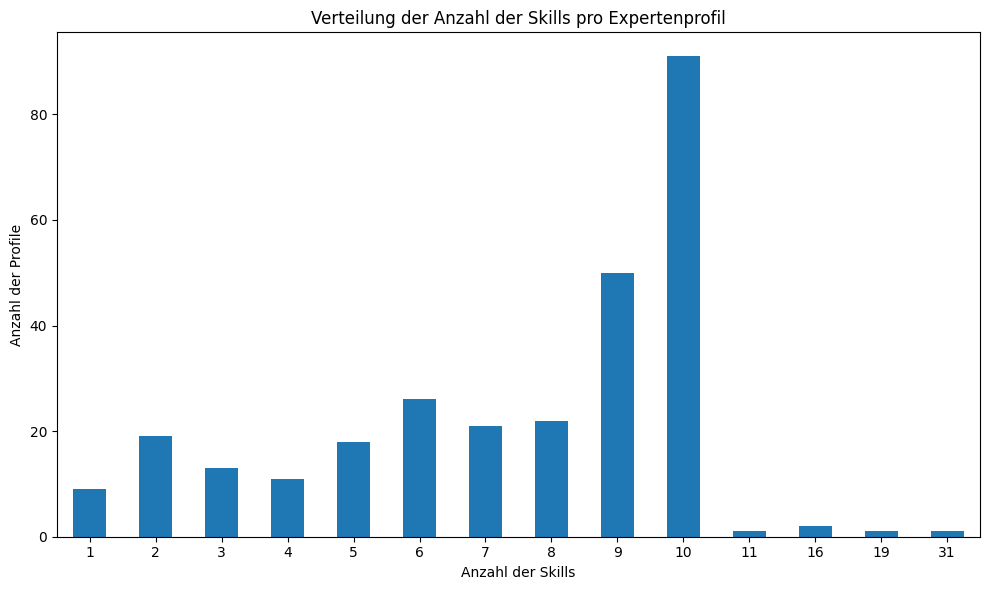

In [ ]:
import matplotlib.pyplot as plt

# Return number of skills for a given profile.
# Non-list or missing values are treated as zero.
def count_skills_per_profile(skills_list):
    if isinstance(skills_list, list):
        return len(skills_list)
    return 0


# Filter profiles that contain at least one skill.
expert_df_with_skills = expert_df[
    expert_df['skills'].apply(lambda x: isinstance(x, list) and len(x) > 0)
]

# Compute distribution of skill counts per profile.
skills_counts_per_profile = (
    expert_df_with_skills['skills']
    .apply(count_skills_per_profile)
    .value_counts()
    .sort_index()
)

print("Verteilung der Anzahl der skills pro Profil:")
print(skills_counts_per_profile)

# Visualize distribution as bar chart.
plt.figure(figsize=(10, 6))
skills_counts_per_profile.plot(kind='bar')

# Configure title and axis labels.
plt.title('Verteilung der Anzahl der Skills pro Expertenprofil')
plt.xlabel('Anzahl der Skills')
plt.ylabel('Anzahl der Profile')

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Skill-Kategorie Kookkurrenz-Matrix:


,IT & Softwareentwicklung,Kreatives & Design,Marketing & Kommunikation,Business & Management,Personalwesen & Coaching,"Handwerk, Technik & Produktion",Sonstiges,Lehre & Forschung
IT & Softwareentwicklung,93,22,47,78,27,17,5,5
Kreatives & Design,22,55,30,36,10,18,4,3
Marketing & Kommunikation,47,30,133,110,57,12,6,3
Business & Management,78,36,110,229,78,41,12,9
Personalwesen & Coaching,27,10,57,78,91,7,8,5
"Handwerk, Technik & Produktion",17,18,12,41,7,66,8,4
Sonstiges,5,4,6,12,8,8,17,2
Lehre & Forschung,5,3,3,9,5,4,2,11


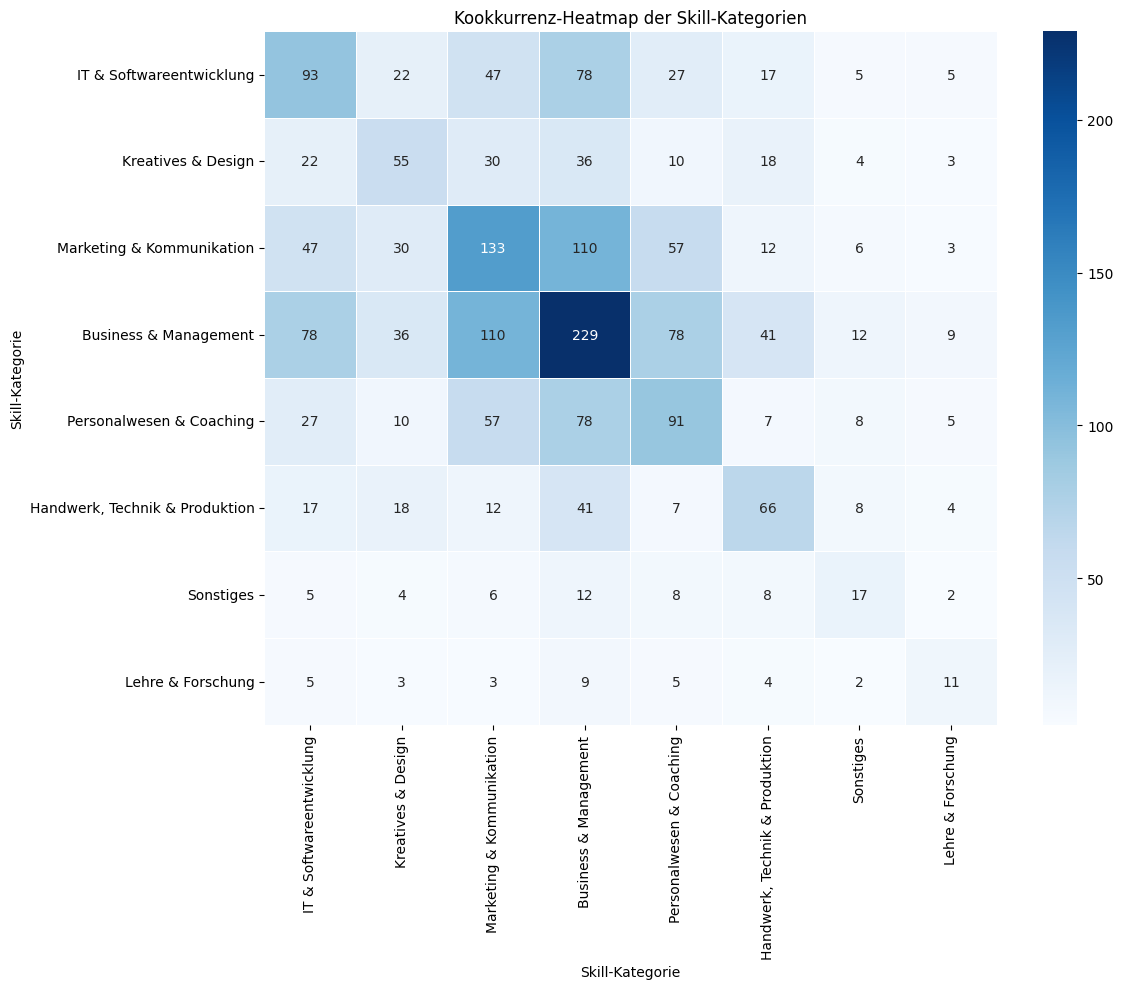

In [ ]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Extract unique skill categories.
unique_skill_categories = (
    expert_df_categorized_skills['Kategorie']
    .dropna()
    .unique()
    .tolist()
)

# Initialize symmetric co-occurrence matrix (zero-filled).
skill_category_co_occurrence_matrix = pd.DataFrame(
    0,
    index=unique_skill_categories,
    columns=unique_skill_categories
)

# Aggregate skill categories per profile.
profile_categories = (
    expert_df_categorized_skills
    .groupby('id')['Kategorie']
    .apply(list)
    .reset_index()
)

# Update co-occurrence counts for a single profile.
def process_profile_skill_categories(categories_list):
    if isinstance(categories_list, list) and len(categories_list) > 1:

        # Remove duplicates to avoid double counting within a profile.
        categories_list = list(set(categories_list))

        # Increment pairwise co-occurrence counts.
        for cat1, cat2 in itertools.combinations(categories_list, 2):
            if cat1 in unique_skill_categories and cat2 in unique_skill_categories:
                skill_category_co_occurrence_matrix.loc[cat1, cat2] += 1
                skill_category_co_occurrence_matrix.loc[cat2, cat1] += 1


# Apply co-occurrence update per profile.
profile_categories['Kategorie'].apply(process_profile_skill_categories)

# Compute number of profiles per individual category.
individual_category_counts = (
    expert_df_categorized_skills
    .groupby('Kategorie')['id']
    .nunique()
)

# Set diagonal values to individual category counts.
for category in unique_skill_categories:
    if category in individual_category_counts:
        skill_category_co_occurrence_matrix.loc[category, category] = (
            individual_category_counts[category]
        )

print("Skill-Kategorie Kookkurrenz-Matrix:")
display(skill_category_co_occurrence_matrix)


# Visualize co-occurrence matrix as heatmap.
plt.figure(figsize=(12, 10))
sns.heatmap(
    skill_category_co_occurrence_matrix,
    annot=True,
    fmt='d',
    cmap='Blues',
    linewidths=.5
)

# Configure title and axis labels.
plt.title('Kookkurrenz-Heatmap der Skill-Kategorien')
plt.xlabel('Skill-Kategorie')
plt.ylabel('Skill-Kategorie')

plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()